In [3]:
!pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   --------- ------------------------------ 153.6/626.3 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/626.3 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 2.4 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 2.5 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
data = pd.read_csv("blogs.csv")
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
# Display dataset structure
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Task 1: Data Preprocessing
# Drop rows with missing values
data.dropna(inplace=True)



                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Data      0
Labels    0
dtype: int64


In [8]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

data['Cleaned_Data'] = data['Data'].apply(preprocess_text)



In [9]:
# Tokenize and remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['Cleaned_Data'] = data['Cleaned_Data'].apply(remove_stopwords)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\punee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Cleaned_Data'])
y = data['Labels']

In [11]:
# Task 2: Naive Bayes Model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.81      0.84      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88      0.88      

In [12]:
# Task 3: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data['Sentiment'] = data['Data'].apply(get_sentiment)



In [13]:
# Analyze sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)



Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


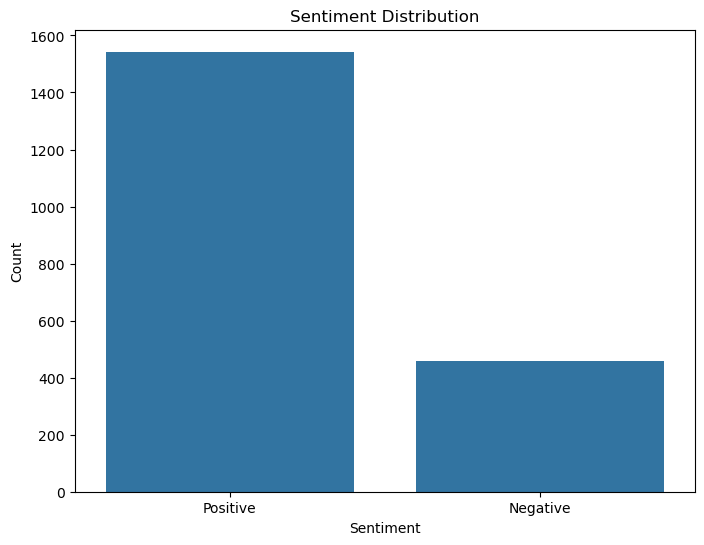

In [14]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



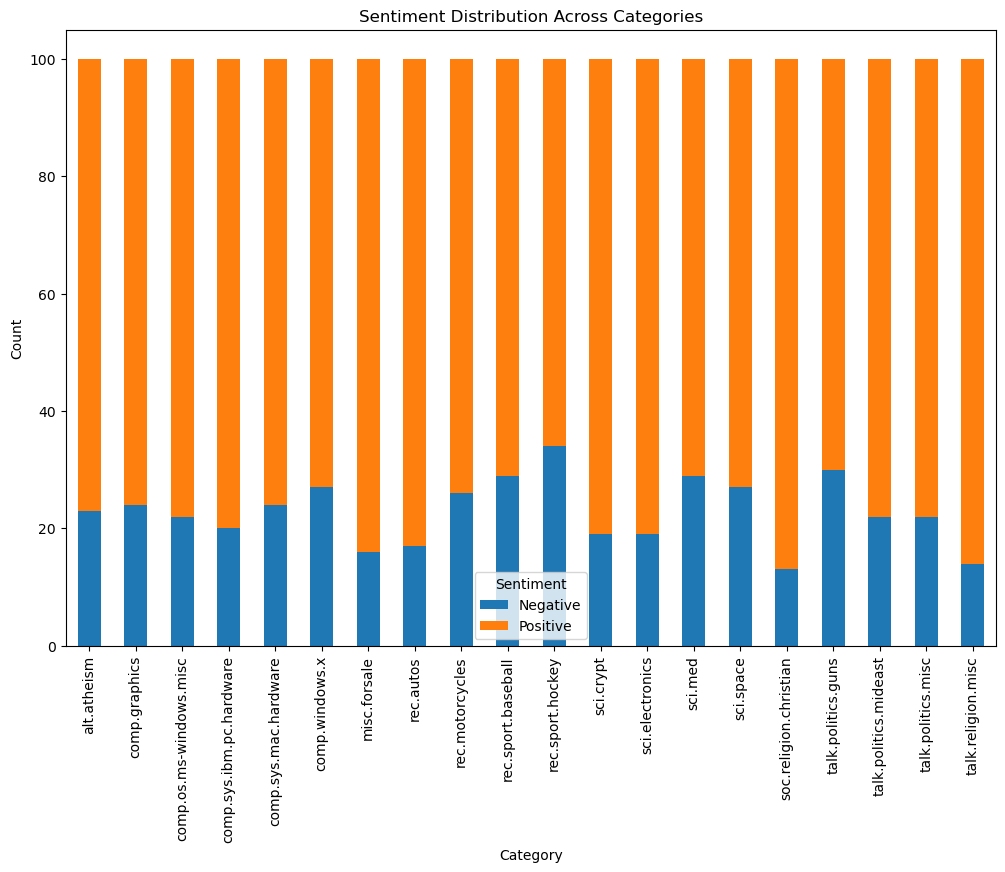

In [15]:
# Sentiment distribution across categories
sentiment_category_dist = data.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_category_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()



In [16]:
# Task 4: Reflection and Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")



Accuracy: 0.8400
Precision: 0.8467
Recall: 0.8400
F1-Score: 0.8331


In [17]:
# Reflect on challenges
print("Challenges faced:")
print("- Balancing class distribution if it's imbalanced.")
print("- Effectively tuning the TF-IDF parameters for optimal feature extraction.")
print("- Managing stopwords and preprocessing text data efficiently.")

Challenges faced:
- Balancing class distribution if it's imbalanced.
- Effectively tuning the TF-IDF parameters for optimal feature extraction.
- Managing stopwords and preprocessing text data efficiently.
